# Amazon Video Games



In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

data = pd.read_csv("../../data/amazon-video-games/ratings_Video_Games.csv",
                   delimiter=",",
                   encoding="ISO-8859-1")
data.columns=["user","game","rating","r_id"]

data.head()

,user,game,rating,r_id
0,1,0,4.0,1372896000
1,2,1,5.0,1404950400
2,3,1,5.0,1386115200
3,4,1,1.0,1366156800
4,5,1,5.0,1374192000


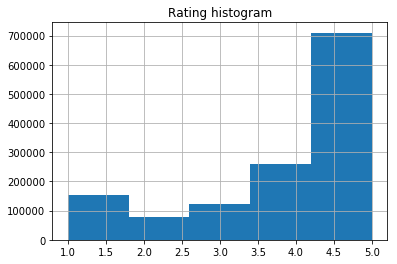

In [12]:
data["rating"].hist(bins=5).set_title("Rating histogram")

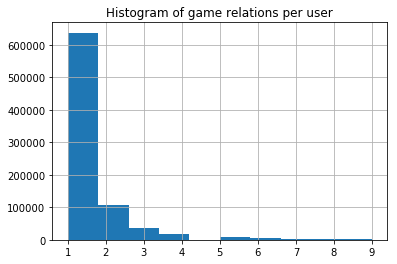

In [13]:
aux = data
aux["count"] = 1
games_per_user = aux.groupby("user").sum()["count"]
plot = games_per_user[games_per_user<10].hist(bins=10)
plot.set_title("Histogram of game relations per user")

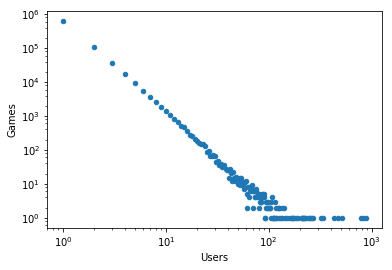

In [14]:
def to_loglog (series,x_label,y_label):
    aux_df = series.to_frame()
    aux_df.columns = ['count1']
    aux_df["count2"] = 1
    df = aux_df.groupby("count1").sum()["count2"].to_frame()
    df.reset_index(inplace=True)
    df.columns = [x_label,y_label]
    df.plot(kind='scatter',x=x_label,y=y_label,loglog=True)

to_loglog(games_per_user,x_label = 'Users',y_label = 'Games')

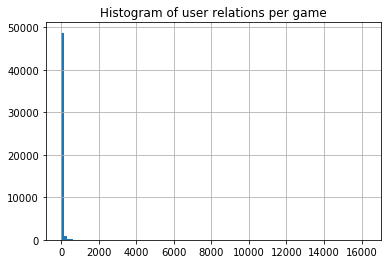

In [15]:
users_per_game = data.groupby("game").count()["count"]
plot = users_per_game.hist(bins=100)
plot.set_title("Histogram of user relations per game")

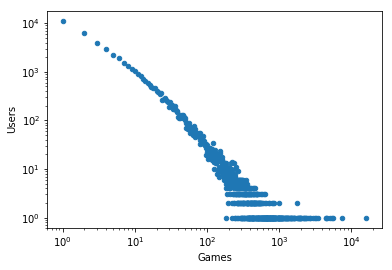

In [16]:
to_loglog(users_per_game,x_label = 'Games',y_label = 'Users')

## Sparsity    


Given that we have very different datasets, like *Jester* and *Amazon Books*, it's interesting to compare sparsity between the user-item matrices. Since at most each user has an edge with each artist, the maximum possible amount of edges is $|E|_{max} = |\mathrm{Artists}| * |\mathrm{Users}|$. So we define sparsity:    

\begin{equation}
    \mathrm{Sparsity} = \frac{|E|}{|E|_{max}}
\end{equation}    

In [5]:
n_users = data["user"].unique().shape[0]
n_games = data["game"].unique().shape[0]

sparsity = data.shape[0]/(n_users*n_games)
print("Sparsity is %.8f"%sparsity)

Sparsity is 0.00003191
